# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

# **Aprendizaje Supervisado**

## Entregable: MODELO DE CLASIFICACIÓN PARTE 2

## GRUPO Nº24

## INTEGRANTES:
   - Clarisa Manzone
   - Nico Rosales
   - Daniel Rubio
   - Diana Fonnegra
   ------

## Red Neuronal como modelo de clasificación
-------

In [44]:
# Importación de modulos

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pprint import pprint


from scipy.stats import norm

from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder



from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score, cross_validate, KFold, StratifiedKFold, \
    LeaveOneOut, LeavePOut,train_test_split, GridSearchCV, StratifiedKFold

from sklearn.metrics import recall_score, accuracy_score, precision_score, \
    f1_score, roc_auc_score, mean_squared_error, r2_score, confusion_matrix, \
    classification_report, ConfusionMatrixDisplay, accuracy_score, ConfusionMatrixDisplay, \
    classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

import missingno as msno

# Imports especificos para Redes Neuronales
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

sns.set_context('talk')
warnings.filterwarnings("ignore")

### Lectura del dataset

In [45]:
# Carga de los datasets (train y test)
train_titanic = pd.read_csv('CK_train.csv')
test_titanic = pd.read_csv('CK_test.csv')

### Extracción y resguardo de las etiquetas del set de entrenamiento

In [46]:
y = train_titanic['Transported']
y.replace({False: 0, True: 1},inplace=True)

### Lectura del dataset con los datos curados (Entrenamiento y prueba)
 - En el dataframe g_dataset cargamos los datos curados
 - IMPORTANTE: No confundir g_dataset con el homonimo de etapas previas de estudio(ej: EDA y curado).
 - g_dataset contiene datos preparados para aplicar directamente sobre el desarrollo de los modelos de clasificación

In [47]:
g_dataset = pd.read_csv('g_dataset_c.csv')
g_dataset.shape

(8693, 36)

### Separacion de los grupo de entrenamiento y prueba globales.
 - X representa el set de entrenamiento global.
 - A partir del mismo se generará el conjunto de entrenamiento y test para el desarrollo de los diferentes modelos.

In [48]:
X = g_dataset[: len(train_titanic)]
X_to_predict = g_dataset[len(train_titanic):]

# El set de datos disponible para el estudio y desarrollo de los modelos de clasificación
X.shape, y.shape

((7823, 36), (7823,))

In [49]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=10)

### Modelo de Red Neuronal

In [50]:
model= keras.Sequential([

    layers.BatchNormalization(input_shape=[36]),

    layers.Dropout(rate=0.3),
    layers.Dense(units=1024, activation='swish'),
    layers.BatchNormalization(),

    layers.Dropout(rate=0.3),
    layers.Dense(units=256, activation='swish'),
    layers.BatchNormalization(),

    layers.Dropout(rate=0.3),
    layers.Dense(units=128, activation='swish'),
    layers.BatchNormalization(),

    layers.Dense(units=1,activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.01,
    restore_best_weights=True,
)

### Entrenamiento

Epoch 1/200
25/25 [==============================] - 2s 35ms/step - loss: 0.6085 - binary_accuracy: 0.6978 - val_loss: 0.5914 - val_binary_accuracy: 0.7700
Epoch 2/200
25/25 [==============================] - 1s 27ms/step - loss: 0.5209 - binary_accuracy: 0.7367 - val_loss: 0.5849 - val_binary_accuracy: 0.8089
Epoch 3/200
25/25 [==============================] - 1s 31ms/step - loss: 0.5003 - binary_accuracy: 0.7493 - val_loss: 0.5725 - val_binary_accuracy: 0.8026
Epoch 4/200
25/25 [==============================] - 1s 29ms/step - loss: 0.4849 - binary_accuracy: 0.7565 - val_loss: 0.5508 - val_binary_accuracy: 0.8051
Epoch 5/200
25/25 [==============================] - 1s 26ms/step - loss: 0.4962 - binary_accuracy: 0.7523 - val_loss: 0.5545 - val_binary_accuracy: 0.7955
Epoch 6/200
25/25 [==============================] - 1s 28ms/step - loss: 0.4938 - binary_accuracy: 0.7454 - val_loss: 0.5298 - val_binary_accuracy: 0.7974
Epoch 7/200
25/25 [==============================] - 1s 26ms/ste

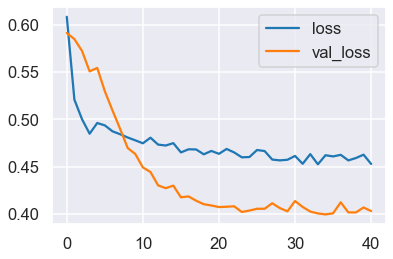

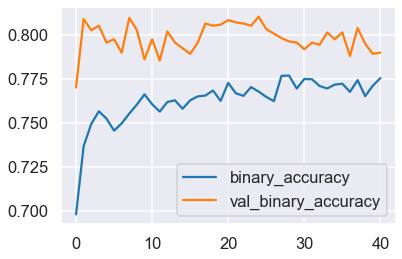

In [51]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=200,
    callbacks=[early_stopping],
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['binary_accuracy','val_binary_accuracy']].plot();

### Entrenamiento con todo el set de datos!

Epoch 1/35
16/16 [==============================] - 1s 41ms/step - loss: 0.4551 - binary_accuracy: 0.7746
Epoch 2/35
16/16 [==============================] - 1s 46ms/step - loss: 0.4560 - binary_accuracy: 0.7740
Epoch 3/35
16/16 [==============================] - 1s 45ms/step - loss: 0.4600 - binary_accuracy: 0.7693
Epoch 4/35
16/16 [==============================] - 1s 46ms/step - loss: 0.4635 - binary_accuracy: 0.7697
Epoch 5/35
16/16 [==============================] - 1s 49ms/step - loss: 0.4509 - binary_accuracy: 0.7759
Epoch 6/35
16/16 [==============================] - 1s 49ms/step - loss: 0.4593 - binary_accuracy: 0.7730
Epoch 7/35
16/16 [==============================] - 1s 43ms/step - loss: 0.4588 - binary_accuracy: 0.7732
Epoch 8/35
16/16 [==============================] - 1s 44ms/step - loss: 0.4591 - binary_accuracy: 0.7711
Epoch 9/35
16/16 [==============================] - 1s 48ms/step - loss: 0.4562 - binary_accuracy: 0.7744
Epoch 10/35
16/16 [===========================

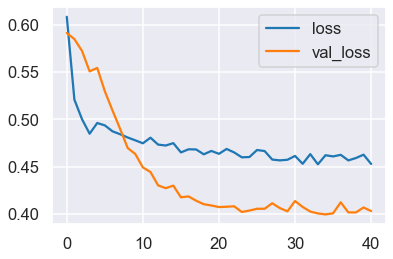

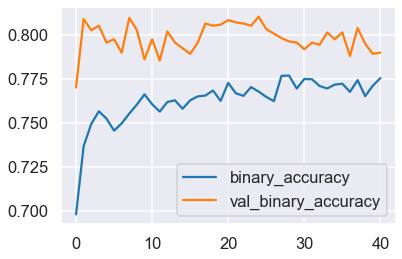

In [52]:
#Para mejorar la precisión ajustamos el modelo con el conjunto de entrenamiento completo
model.fit(
    X, y,
    batch_size=512,
    epochs=35,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['binary_accuracy','val_binary_accuracy']].plot();

In [53]:
test_predictions = model.predict(X_to_predict)
submission = pd.DataFrame(list(zip(test_titanic["PassengerId"], test_predictions)),
                          columns=["PassengerId", "Transported"])
submission = pd.DataFrame(list(zip(test_titanic["PassengerId"], test_predictions)),
                          columns=["PassengerId", "Transported"])
submission['Transported'] = np.where(test_predictions > 0.5, 1, 0)


# submission.to_csv('submission_06.csv', index = False)
model.predict(X_train)
np.where(model.predict(X_train) > 0.5, 1, 0)

196/196 [==============================] - 0s 2ms/step


array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [0]])

### Métricas del modelo seleccionado para el submmit a Kaggle

196/196 [==============================] - 0s 2ms/step
Accuracy train Red Neuronal: 81.93%
49/49 [==============================] - 0s 2ms/step
Accuracy test Arbol de decisión: 83.32%


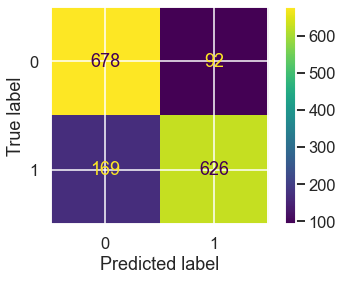

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       770
           1       0.87      0.79      0.83       795

    accuracy                           0.83      1565
   macro avg       0.84      0.83      0.83      1565
weighted avg       0.84      0.83      0.83      1565



In [54]:
train_predictions = np.where(model.predict(X_train) > 0.5, 1, 0)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train Red Neuronal: %.2f%%" % (accuracy * 100.0))

test_predictions = np.where(model.predict(X_test) > 0.5, 1, 0)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test Arbol de decisión: %.2f%%" % (accuracy * 100.0))

ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,test_predictions))

———–FINAL PARTE 4 de 5————–